In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, complete, average

Cria e apresenta um dataframe com cinco registros. Seus atributos são as posições de cada ponto nos eixos X e Y.


In [3]:
df = pd.DataFrame([[1.5, 1,'A'], [2.25, 2.25,'B'], [1.25, 1.5,'C'],[3, 3,'D'], [3.5, 3.5,'E']], columns=['X', 'Y','ID'])
df = df.set_index('ID')
print(df)

       X     Y
ID            
A   1.50  1.00
B   2.25  2.25
C   1.25  1.50
D   3.00  3.00
E   3.50  3.50


C:\Users\roberto\AppData\Local\Temp\ipykernel_9072\65688662.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g.text(df['X'][i], df['Y'][i], df.index[i], fontsize=14, weight='bold')


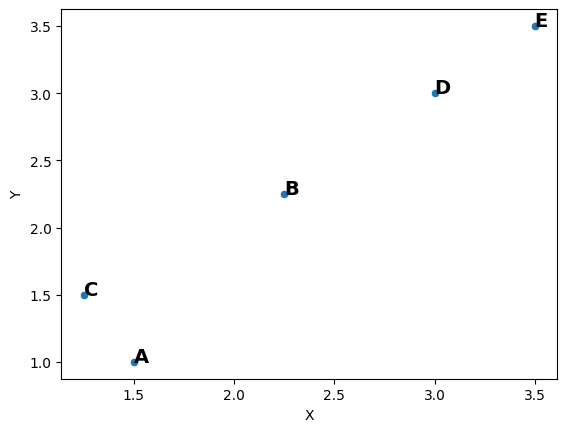

In [4]:
g = sns.scatterplot(data=df, x='X', y='Y')
for i in range(0,df.shape[0]):
    g.text(df['X'][i], df['Y'][i], df.index[i], fontsize=14, weight='bold')

Cria um novo atributo no dataframe, denominado grupo que recebe o resultado do algoritmo de cluster hierárquico usando o método single-linkage. Em seguida, apresenta o diagrama de dispersão com os pontos coloridos de acordo com o resultado do agrupamento.




       X     Y Grupo
ID                  
A   1.50  1.00     1
B   2.25  2.25     0
C   1.25  1.50     1
D   3.00  3.00     0
E   3.50  3.50     0


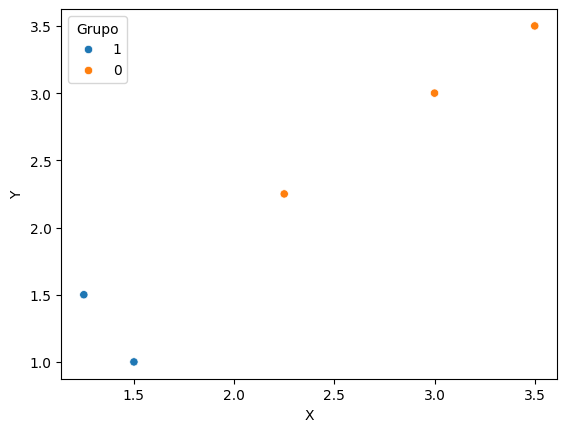

In [5]:
modelo = AgglomerativeClustering(n_clusters=2,linkage='single')
modelo.fit(df)

df['Grupo'] = modelo.labels_
df['Grupo'] = df['Grupo'].astype(str)

print(df)

sns.scatterplot(data=df, x='X', y='Y', hue='Grupo')
plt.show()

Cria um dendrograma usando o método de single-linkage (distância mínima) e cria os clusters usando o mesmo método.

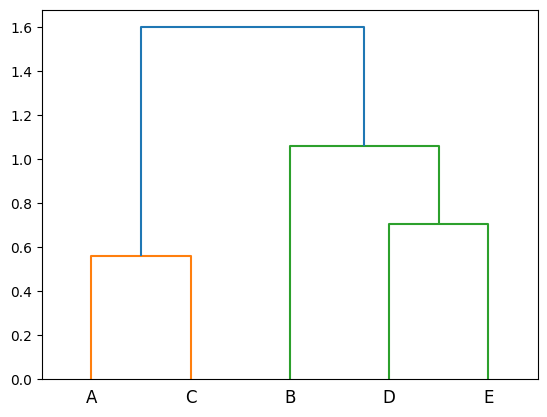

In [6]:
dendrograma = linkage(df)
grafico = dendrogram(dendrograma, labels=df.index)
plt.show()

Repete os passos anteriores, usando o método complete-linkage (distância máxima) para agrupamento dos clusters.

       X     Y Grupo
ID                  
A   1.50  1.00     0
B   2.25  2.25     0
C   1.25  1.50     0
D   3.00  3.00     1
E   3.50  3.50     1


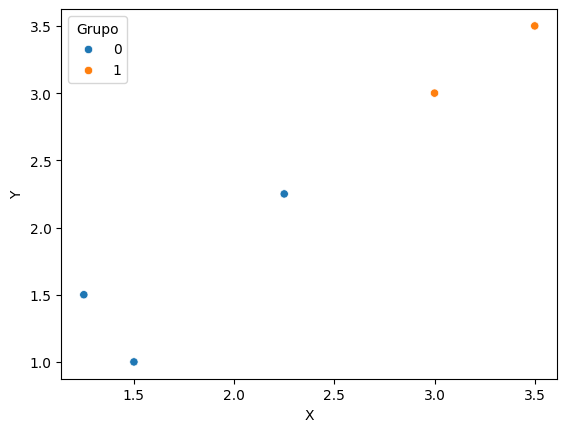

In [7]:
modelo = AgglomerativeClustering(n_clusters=2,linkage='complete')
modelo.fit(df)

df['Grupo'] = modelo.labels_
df['Grupo'] = df['Grupo'].astype(str)

print(df)

sns.scatterplot(data=df, x='X', y='Y', hue='Grupo')
plt.show()

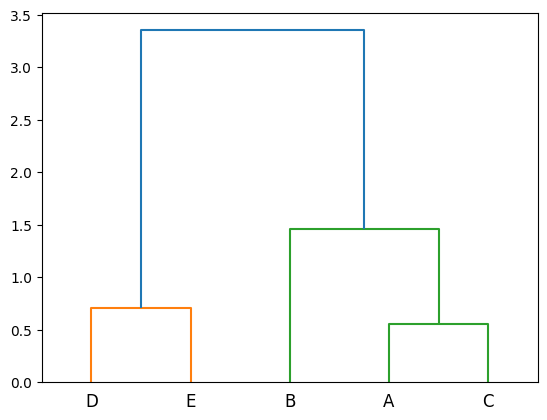

In [8]:
dendrograma = complete(df)
grafico = dendrogram(dendrograma, labels=df.index)
plt.show()

Repete os passos anteriores, usando o método average-linkage (distância média) para agrupamento dos clusters.

       X     Y Grupo
ID                  
A   1.50  1.00     0
B   2.25  2.25     0
C   1.25  1.50     0
D   3.00  3.00     1
E   3.50  3.50     1


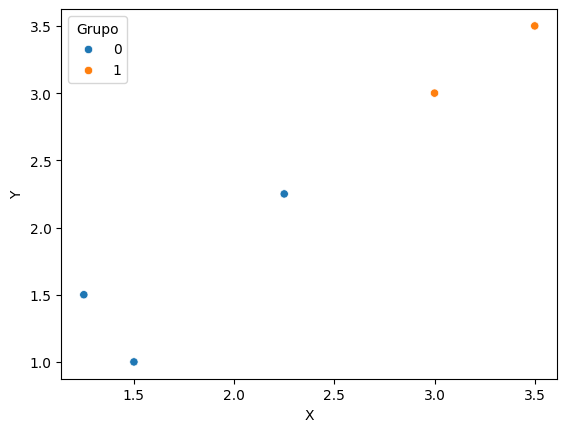

In [9]:
modelo = AgglomerativeClustering(n_clusters=2,linkage='average')
modelo.fit(df)

df['Grupo'] = modelo.labels_
df['Grupo'] = df['Grupo'].astype(str)

print(df)

sns.scatterplot(data=df, x='X', y='Y', hue='Grupo')
plt.show()

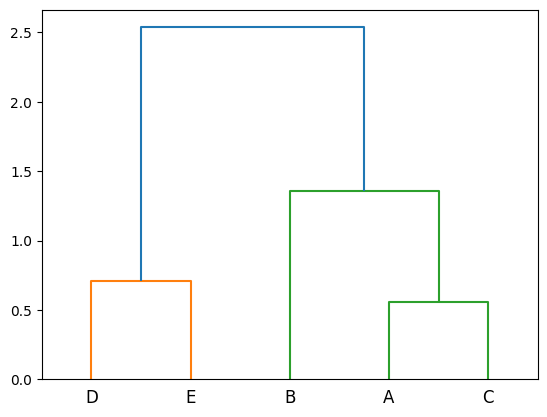

In [10]:
dendrograma = average(df)
grafico = dendrogram(dendrograma, labels=df.index)
plt.show()